<h1> SVM model on the KDD99 data set </h1>

In [1]:
#Importing Libraries
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import time  
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from sklearn import svm

In [2]:
#Appending the column names as headers to do the further manipulations
cols ="""duration, 
protocol_type, 
service, 
flag, 
src_bytes, 
dst_bytes, 
land, 
wrong_fragment, 
urgent, 
hot, 
num_failed_logins, 
logged_in, 
num_compromised, 
root_shell, 
su_attempted, 
num_root, 
num_file_creations, 
num_shells, 
num_access_files, 
num_outbound_cmds, 
is_host_login, 
is_guest_login, 
count, 
srv_count, 
serror_rate, 
srv_serror_rate, 
rerror_rate, 
srv_rerror_rate, 
same_srv_rate, 
diff_srv_rate, 
srv_diff_host_rate, 
dst_host_count, 
dst_host_srv_count, 
dst_host_same_srv_rate, 
dst_host_diff_srv_rate, 
dst_host_same_src_port_rate, 
dst_host_srv_diff_host_rate, 
dst_host_serror_rate, 
dst_host_srv_serror_rate, 
dst_host_rerror_rate, 
dst_host_srv_rerror_rate"""
  
columns =[] 
for c in cols.split(', '): 
    if(c.strip()):
        columns.append(c.strip()) 
columns.append('target') 
print(len(columns)) 

42


In [3]:
#Dictionary to divide into key and value pairs furthur into dos vs not dos class. dos class is 0 and not dos class is 1. 
attacks_types = { 
'normal': 1, 
'back': 0, 
'buffer_overflow': 1, 
'ftp_write': 1, 
'guess_passwd': 1, 
'imap': 1, 
'ipsweep': 1, 
'land': 0, 
'loadmodule': 1, 
'multihop': 1, 
'neptune': 0, 
'nmap': 1, 
'perl': 1, 
'phf': 1, 
'pod': 0, 
'portsweep': 1, 
'rootkit': 1, 
'satan': 1, 
'smurf': 0, 
'spy': 1, 
'teardrop': 0, 
'warezclient': 1, 
'warezmaster': 1, 
}  

In [4]:
#Loading the data that was downloaded in the local machine from the link provided by the professor in the homework details.
#http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html
data = pd.read_csv(r"C:\Users\palak\Documents\kddcup.data_10_percent.gz", names = columns) 
# Appending Attack Type column that will be furthur used into classification
data['Attack Type'] = data.target.apply(lambda r:attacks_types[r[:-1]]) 
data.head() 

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,1
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,1
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,1
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,1
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,1


In [5]:
#Trying to see the number of attack types as dos
data[(data['Attack Type']!=1)]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
7601,0,tcp,telnet,S0,0,0,0,0,0,0,...,1.00,0.00,0.20,0.33,1.0,0.83,0.0,0.0,neptune.,0
7602,0,tcp,telnet,S0,0,0,0,0,0,0,...,1.00,0.00,0.07,0.12,1.0,0.94,0.0,0.0,neptune.,0
7793,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,0.02,0.02,0.02,0.00,0.0,0.00,0.0,0.0,smurf.,0
7794,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,0.08,0.02,0.08,0.00,0.0,0.00,0.0,0.0,smurf.,0
7795,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,0.14,0.02,0.14,0.00,0.0,0.00,0.0,0.0,smurf.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490960,0,udp,private,SF,28,0,0,3,0,0,...,0.38,0.01,0.38,0.00,0.0,0.00,0.0,0.0,teardrop.,0
490961,0,udp,private,SF,28,0,0,3,0,0,...,0.38,0.01,0.38,0.00,0.0,0.00,0.0,0.0,teardrop.,0
490962,0,udp,private,SF,28,0,0,3,0,0,...,0.38,0.01,0.38,0.00,0.0,0.00,0.0,0.0,teardrop.,0
490963,0,udp,private,SF,28,0,0,3,0,0,...,0.39,0.01,0.39,0.00,0.0,0.00,0.0,0.0,teardrop.,0


In [6]:
#Trying to see the number of attack types as not dos
data[(data['Attack Type']== 1)]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.,1
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.,1
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,1
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,1
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.,1
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,1
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.,1
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.,1


In [7]:
#Dropping the target column
data = data.drop(['target', ], axis = 1)

In [8]:
#label encoding for protocol type
data["protocol_type"] = data["protocol_type"].astype('category')
data["protocol_type"] = data["protocol_type"].cat.codes
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack Type
0,0,1,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,1
1,0,1,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,1
2,0,1,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,1
3,0,1,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,1
4,0,1,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,1


In [9]:
#label encoding for service type
data["service"] = data["service"].astype('category')
data["service"] = data["service"].cat.codes
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack Type
0,0,1,22,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,1
1,0,1,22,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,1
2,0,1,22,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,1
3,0,1,22,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,1
4,0,1,22,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,1


In [10]:
#label encoding for flag type
data["flag"] = data["flag"].astype('category')
data["flag"] = data["flag"].cat.codes
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack Type
0,0,1,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,1
1,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,1
2,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,1
3,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,1
4,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,1


In [11]:
# Target in y in our case target is Attack Type and all the features other than target in x 
y = data[['Attack Type']] 
X = data.drop(['Attack Type', ], axis = 1)

In [12]:
print(y.shape, X.shape)

(494021, 1) (494021, 41)


In [13]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
#We need to undersample the data because it is highly imbalanced
print('Original dataset shape %s' % Counter(y))
y=y.astype('int')
undersample = RandomUnderSampler(sampling_strategy='all')
X, y = undersample.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y))
print(y.shape, X.shape)

Original dataset shape Counter({'Attack Type': 1})
Resampled dataset shape Counter({'Attack Type': 1})
(205126, 1) (205126, 41)


In [14]:
#Scaling
sc = MinMaxScaler() 
X = sc.fit_transform(X)

In [15]:
# Splitting the data into test and train data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) 
y_test=y_test.astype('int')
y_train=y_train.astype('int')
print(X_train.shape, X_test.shape) 
print(y_train.shape, y_test.shape)

(164100, 41) (41026, 41)
(164100, 1) (41026, 1)


C:\Users\palak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.9964900307122313
Weights :  [[  1.70860568   2.93435455   0.0872913    0.95250085   0.07128701
    0.68598052  -0.94661048  -8.13037947   0.         -12.57112321
    2.3177765   -0.29946561  -0.41933226   1.           0.45073438
    0.05982761   0.92857143   0.5          0.72622923   0.
    0.          11.11132965  -1.55830982  -0.96586963   0.14001926
   -0.7480978    1.93156393  -1.34432676   3.11215426   3.1935716
    0.39016532  -1.21875906   0.95356593  -1.89616526   2.01065517
    0.94149193   0.2322686   -1.69348918  -0.92652268  -0.89545387
    0.27412471]]


C:\Users\palak\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


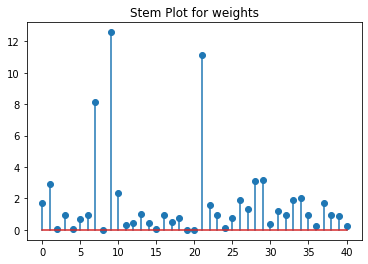

In [16]:
#SVM model using linear kernel using all the features.
svc=svm.SVC(probability=False, kernel="linear")
svc.fit(X_train,y_train)
print("Accuracy:", metrics.accuracy_score(svc.predict(X_test), y_test))
weights=abs(svc.coef_.flatten())
print("Weights : ",svc.coef_)
plt.stem(weights)
plt.title("Stem Plot for weights")
plt.show()

In [17]:
##SVM model using rbf kernel using all the features.
svc=svm.SVC(probability=False, kernel="rbf")
svc.fit(X_train,y_train)
print("Accuracy:", metrics.accuracy_score(svc.predict(X_test), y_test))

C:\Users\palak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.997075025593526


In [18]:
##SVM model using poly kernel using all the features.
svc=svm.SVC(probability=False, kernel="poly")
svc.fit(X_train,y_train)
print("Accuracy:", metrics.accuracy_score(svc.predict(X_test), y_test))

C:\Users\palak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.9973431482474528


In [19]:
##SVM model using sigmoid kernel using all the features.
svc=svm.SVC(probability=False, kernel="sigmoid")
svc.fit(X_train,y_train)
print("Accuracy:", metrics.accuracy_score(svc.predict(X_test), y_test))

C:\Users\palak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.9718227465509677


In [33]:
import pandas as pd
print("Summary of the results")

results = {'Model': ['Accuracy'],
           'Linear': ['0.9964900307122313'],
           'RBF': ['0.997075025593526'],
           'Polynomial': ['0.9973431482474528'],
           'Sigmoid': ['0.9718227465509677'],
        }

df = pd.DataFrame(results)
print(df)

Summary of the results
      Model              Linear                RBF          Polynomial  \
0  Accuracy  0.9964900307122313  0.997075025593526  0.9973431482474528   

              Sigmoid  
0  0.9718227465509677  


<h1> Discussing the Kernels </h1>
<b> Linear Kernel </b> 
The simplest and most commonly used kernel is linear kernel, which can be used when the data is linearly separable using a single line. 
It is used when there are many features in a dataset. One example is Text Classification 
Advantages of using Linear Kernel:

1. Training a SVM with a Linear Kernel is Faster than with any other Kernel.

2. When training a SVM with a Linear Kernel, only the optimisation of the C

<b> Polynomial Kernel </b>
It is a non stationary kernel that are suited for problems where all the training data is normalized.
The polynomial kernel is used with SVM and other kernelized models.It is popular in Natural Language Processing. The most common degree is d = 2 as larger degrees tend to overfit on NLP problems.
It is less useful for efficiency (computational as well as predictive) performance reasons.

<b> Sigmoid Kernel </b>
Sigmoid kernel is similar to two layer perceptron neural network. It is performed well in practice. 
However, as the kernel matrix may not be positive semidefinite (PSD), it is not widely used and the behavior is unknown.
We can use it as the proxy for neural networks.

<b> RBF Kernel </b>
Radial Basis Function kernel for non-linear problems.
Radial basis kernel uses exponent and we know the expansion of e^x gives a polynomial equation of infinite power, so using this kernel, we make our regression/classification line infinitely powerful too.

In [20]:
#By looking at the graph of the linear model and considering the weights, I would say that 10th and 22nd features are important as they have highest weights.
X_2feature = X[:, [9, 21]]

In [21]:
X_2feature

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [22]:
#Getting the important features in X for training
X_2feature_train = X_train[:,[9,21]]

In [23]:
X_2feature_train

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [24]:
##Getting the important features in X for testing
X_2feature_test = X_test[:,[9,21]]

In [25]:
X_2feature_test

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [26]:
#Classifying
X_2feature_train, y_train = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=0)
X_2feature_test, y_test = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=0)

In [27]:
print(X_2feature_test.shape, X_2feature_train.shape, y_train.shape, y_test.shape)

(1000, 2) (1000, 2) (1000,) (1000,)


In [28]:
#Class that is used to plot the graphs below
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('o', 'x')
    colors = ('green', 'orange')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5 #Min max values for the grid
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.05, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],marker=markers[idx],label=cl,edgecolor='black')

Accuracy: 0.964


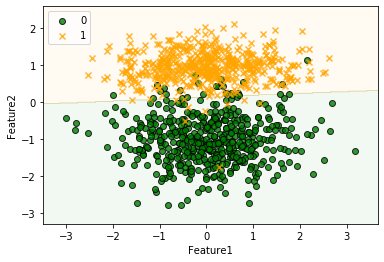

In [29]:
#Train SVM model using two features and linear kernel and visualizing the decision boundary
svc=svm.SVC(probability=False, kernel="linear")
svc.fit(X_2feature_train,y_train)
print("Accuracy:", metrics.accuracy_score(svc.predict(X_2feature_test), y_test))
plot_decision_regions(X_2feature_test, y_test, classifier=svc)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(loc='upper left')
plt.show()

Accuracy: 0.963


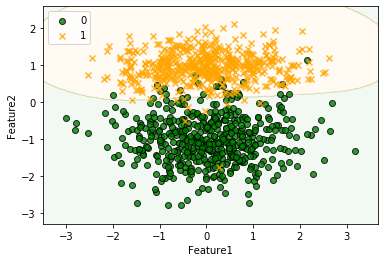

In [30]:
#Train SVM model using two features and rbf kernel and visualizing the decision boundary
svc=svm.SVC(probability=False, kernel="rbf")
svc.fit(X_2feature_train,y_train)
print("Accuracy:", metrics.accuracy_score(svc.predict(X_2feature_test), y_test))
plot_decision_regions(X_2feature_test, y_test, classifier=svc)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(loc='upper left')
plt.show()

<h1> Observations </h1>
As we know that Linear Model is a parametric model and is used for linear problems whereas RBF is not. The complexity of RBF increases with size so we can say that complexity of training is proportional to the size of the dataset. Which makes it expensive for training. We have to keep the kernel matrix and the projection into  “infinite” higher dimensional space.
Furthermore, we have more hyperparameters to tune, so model selection is more expensive as well!
It is much easier to overfit a complex model. And thus, using Linear model is more effective. The accuracy of linear model is also more than the rbf model. 